In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
import scipy.stats
import shapely
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.features

In [3]:
pip install rasterio


Note: you may need to restart the kernel to use updated packages.


In [17]:
# Opening a shapefile with Colombia's municipalities information
path_shp_municipios=r"D:/backup/Documents/00_ia/semestre_12/programacion_sig/Datos/dataset/municipios/municipios_colombia.shp"
df_municipios = gpd.read_file(path_shp_municipios)

df_municipios

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,...,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,Codigo_Mun,geometry
0,18,001,FLORENCIA,18001,2018,2.547638e+09,1.749139,-75.558239,71877.0,32.0,...,48848.0,59610.0,21898.0,4592.0,5892.0,3799.0,2.942508,0.206928,18001,"POLYGON ((850567.651 734450.429, 850602.776 73..."
1,18,029,ALBANIA,18029,2018,4.141221e+08,1.227865,-75.882327,2825.0,24.0,...,1940.0,1712.0,231.0,41.0,215.0,46.0,1.112829,0.033618,18029,"POLYGON ((797693.586 642855.101, 797693.823 64..."
2,18,094,BELÉN DE LOS ANDAQUÍES,18094,2018,1.191619e+09,1.500923,-75.875645,4243.0,54.0,...,3541.0,3340.0,490.0,119.0,720.0,123.0,2.234657,0.096745,18094,"POLYGON ((809754.098 685339.982, 809743.624 68..."
3,18,247,EL DONCELLO,18247,2018,1.106076e+09,1.791386,-75.193944,8809.0,0.0,...,7571.0,6287.0,1029.0,228.0,1095.0,171.0,3.154370,0.089867,18247,"POLYGON ((857152.436 748523.984, 857180 748500..."
4,18,256,EL PAUJÍL,18256,2018,1.234734e+09,1.617746,-75.234043,5795.0,0.0,...,6072.0,4066.0,639.0,108.0,916.0,99.0,3.529316,0.100309,18256,"POLYGON ((856617.069 736147.468, 857365.135 73..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,25,290,FUSAGASUGÁ,25290,2018,1.939529e+08,4.323534,-74.388591,78073.0,0.0,...,39588.0,52504.0,25227.0,3591.0,3823.0,2293.0,1.026143,0.015800,25290,"POLYGON ((975638.881 980969.367, 975642.608 98..."
1118,25,662,SAN JUAN DE RIOSECO,25662,2018,3.140873e+08,4.841098,-74.658493,5654.0,0.0,...,3503.0,2385.0,522.0,83.0,588.0,64.0,0.944174,0.025603,25662,"POLYGON ((927827.917 1041265.704, 927839.486 1..."
1119,73,349,HONDA,73349,2018,3.048869e+08,5.179417,-74.783031,11333.0,0.0,...,7574.0,9888.0,2873.0,311.0,1157.0,457.0,1.064832,0.024864,73349,"POLYGON ((917504.922 1079725.053, 917524.682 1..."
1120,05,631,SABANETA,5631,2018,1.583532e+07,6.138305,-75.608806,37843.0,0.0,...,12872.0,27854.0,28441.0,6577.0,1124.0,1035.0,0.172905,0.001293,5631,"POLYGON ((831074.846 1172630.978, 831079.949 1..."


**Vector attribute subsetting**

In [112]:
df_municipios[['STCTNENCUE', 'LATITUD']].rename(columns={'STCTNENCUE': 'Encuesta', 'LATITUD': 'Lat'})

,Encuesta,Lat
0,71877.0,1.749139
1,2825.0,1.227865
2,4243.0,1.500923
3,8809.0,1.791386
4,5795.0,1.617746
...,...,...
1117,78073.0,4.323534
1118,5654.0,4.841098
1119,11333.0,5.179417
1120,37843.0,6.138305


In [156]:
# Boolean subsetting

small_munic = df_municipios[df_municipios['AREA'] < 100000000]
small_munic

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,...,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,Codigo_Mun,geometry
26,19,290,FLORENCIA,19290,2018,5.665264e+07,1.694535,-77.087357,3244.0,0.0,...,2769.0,1518.0,185.0,34.0,250.0,29.0,0.367595,0.004592,19290,"POLYGON ((668815.175 684475.714, 668834.546 68..."
27,19,300,GUACHENÉ,19300,2018,9.886580e+07,3.144390,-76.392348,10437.0,0.0,...,5504.0,9290.0,1830.0,94.0,349.0,145.0,0.633582,0.008031,19300,"POLYGON ((740445.398 847204.637, 740551.3 8472..."
35,19,513,PADILLA,19513,2018,6.968343e+07,3.194731,-76.336242,5445.0,3.0,...,2643.0,4750.0,433.0,46.0,247.0,86.0,0.397177,0.005661,19513,"POLYGON ((747576.38 850524.008, 747613.396 850..."
57,19,845,VILLA RICA,19845,2018,8.162162e+07,3.180627,-76.464456,10101.0,0.0,...,5145.0,10038.0,1470.0,98.0,381.0,158.0,0.650744,0.006629,19845,"POLYGON ((735131.331 852468.366, 735161.625 85..."
61,76,054,ARGELIA,76054,2018,9.079604e+07,4.704288,-76.141650,2900.0,47.0,...,2184.0,1693.0,223.0,33.0,537.0,56.0,0.453826,0.007391,76054,"POLYGON ((770796.13 1020088.555, 770827.135 10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,73,520,PALOCABILDO,73520,2018,6.501113e+07,5.094036,-75.018450,4224.0,0.0,...,4345.0,3053.0,311.0,75.0,674.0,73.0,0.373499,0.005301,73520,"POLYGON ((897531.299 1060523.3, 897551.535 106..."
1113,25,175,CHÍA,25175,2018,8.015804e+07,4.865452,-74.036923,50233.0,441.0,...,25638.0,45250.0,38138.0,9017.0,2165.0,2133.0,0.509914,0.006535,25175,"POLYGON ((1008386.748 1035164.605, 1008525.83 ..."
1114,25,260,EL ROSAL,25260,2018,8.721297e+07,4.879723,-74.238023,9398.0,0.0,...,7406.0,9616.0,2424.0,111.0,357.0,128.0,0.422041,0.007110,25260,"POLYGON ((982526.182 1038992.012, 982528.291 1..."
1120,05,631,SABANETA,5631,2018,1.583532e+07,6.138305,-75.608806,37843.0,0.0,...,12872.0,27854.0,28441.0,6577.0,1124.0,1035.0,0.172905,0.001293,5631,"POLYGON ((831074.846 1172630.978, 831079.949 1..."


In [164]:
idx_small = df_municipios['AREA'] < 100000000
idx_flor = df_municipios['MPIO_CNMBR'] == 'FLORENCIA'
df_municipios.loc[idx_small & idx_flor, ['LATITUD', 'LONGITUD', 'MPIO_CNMBR', 'AREA']]

,LATITUD,LONGITUD,MPIO_CNMBR,AREA
26,1.694535,-77.087357,FLORENCIA,5.665264e+07


In [166]:
df_municipios[df_municipios['MPIO_CNMBR'].isin(['PADILLA', 'PALOCABILDO'])]  \
    .loc[:, ['DPTO_CCDGO', 'MPIO_CCDGO']]

,DPTO_CCDGO,MPIO_CCDGO
35,19,513
1091,73,520


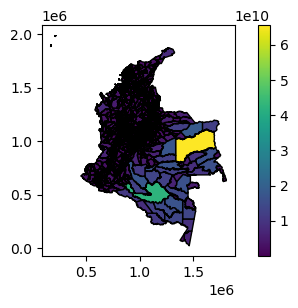

In [176]:
fig, ax = plt.subplots(figsize=(6, 3))
df_municipios.plot(column='AREA', edgecolor='black', legend=True, ax=ax);

**Intersection**: This code is intended to check intersection in a specific township located into La Union municipality 

In [574]:
# Open La Union structural geology Vector layer

path_shp_geology=r"C:\Users\Cristian\Downloads\La Union\Geologia_estructural/Geologia_estructural.shp"
df_geol = gpd.read_file(path_shp_geology)

df_geol

,TIPO_ESTRU,NOM_ESTRUC,COD_CUENCA,ANNO_EST_E,ANNO_EST_A,SHAPE_LEN,geometry
0,100000,Sistema de Fallas Cali,None,0,0,7986.325816,"LINESTRING (4660242.564 2056535.982, 4660201.5..."
1,100000,Sistema de Fallas Cali,None,0,0,10309.444528,"LINESTRING (4664281.608 2063182.739, 4663049.3..."
2,100000,Sistema de Fallas Sureste-Noroeste,None,0,0,9876.339729,"LINESTRING (4660242.564 2056535.982, 4660602.4..."
3,100000,Falla Toro,None,0,0,54184.007718,"LINESTRING (4658042.777 2068828.486, 4657845.6..."
4,100000,Sistema de Fallas Suroeste -Noreste,None,2002,0,41400.738585,"LINESTRING (4651887.741 2068418.903, 4651758.3..."
5,100000,Sistema de Fallas Este-Oeste,None,0,0,2516.798842,"LINESTRING (4663057.388 2065422.36, 4662746.35..."
6,100000,Sistema de Fallas Sureste-Noroeste,None,0,0,2363.890983,"LINESTRING (4657936.855 2057041.22, 4659625.98..."


In [576]:
# Open La Union corregimientos (townships) vector layer

path_shp_correg=r"C:\Users\Cristian\Downloads\La Union\Corregimientos\corregimientos_la_union/corregimientos_la_union.shp"
df_correg = gpd.read_file(path_shp_correg)

df_correg

,COD_DEPART,COD_MUNICI,NOM_MUNICI,COD_DIV_PO,NOM_DIV_PO,CLASE_DIV_,FUENTE,ANNO_DIV_E,ANNO_AJUST,SHAPE_AREA,SHAPE_LEN,geometry
0,76,76400,La Union,76400013,Cabecera Municipal,Cabecera Municipal Zona Rural,None,2010,2022,4.258779e+06,11519.256410,"POLYGON ((4657524.59 2059347.687, 4657523.61 2..."
1,76,76400,La Union,76400006,San Luis,Corregimiento,None,2010,2022,2.690365e+07,29836.147745,"POLYGON ((4662878.209 2065150.94, 4662872.184 ..."
2,76,76400,La Union,76400002,Lindero,Corregimiento,None,2010,2022,1.604606e+07,17511.413509,"POLYGON ((4662332.399 2058758.78, 4662330.847 ..."
3,76,76400,La Union,76020015,La Union,Cabecera Municipal Zona Urbana,"Plan Basico de Ordenamiento Territorial, 2015",2021,2022,3.690474e+06,13887.774347,"POLYGON ((4656868.369 2060778.533, 4656869.862..."
4,76,76400,La Union,76400005,Quebrada Grande,Corregimiento,None,2010,2022,1.277518e+07,22252.182744,"POLYGON ((4651396.204 2062731.654, 4651370.416..."
5,76,76400,La Union,76400004,La Despensa,Corregimiento,None,2010,2022,2.609146e+07,25514.432321,"POLYGON ((4650839.235 2059568.631, 4650847.46 ..."
6,76,76400,La Union,76400003,Aguadas,Corregimiento,None,2010,2022,1.932429e+07,32686.635940,"POLYGON ((4659747.478 2066655.303, 4659749.33 ..."
7,76,76400,La Union,76400001,Corcega,Corregimiento,None,2010,2022,1.174337e+07,23190.306271,"POLYGON ((4663073.474 2062306.671, 4663026.772..."


In [578]:
# Subsetting with just one township (corregimiento)

aguadas = df_correg[df_correg['NOM_DIV_PO'] == 'Aguadas']
aguadas

,COD_DEPART,COD_MUNICI,NOM_MUNICI,COD_DIV_PO,NOM_DIV_PO,CLASE_DIV_,FUENTE,ANNO_DIV_E,ANNO_AJUST,SHAPE_AREA,SHAPE_LEN,geometry
6,76,76400,La Union,76400003,Aguadas,Corregimiento,None,2010,2022,1.932429e+07,32686.63594,"POLYGON ((4659747.478 2066655.303, 4659749.33 ..."


In [580]:
# Use .intersects to evaluate whether a geological fault intersects with Aguadas township

sel = df_geol.intersects(aguadas.geometry.iloc[0])
sel

0    False
1    False
2    False
3     True
4    False
5    False
6    False
dtype: bool

In [582]:
# Identify which of the geological fault intersects Aguadas township

intersect = df_geol[sel]
intersect

,TIPO_ESTRU,NOM_ESTRUC,COD_CUENCA,ANNO_EST_E,ANNO_EST_A,SHAPE_LEN,geometry
3,100000,Falla Toro,None,0,0,54184.007718,"LINESTRING (4658042.777 2068828.486, 4657845.6..."


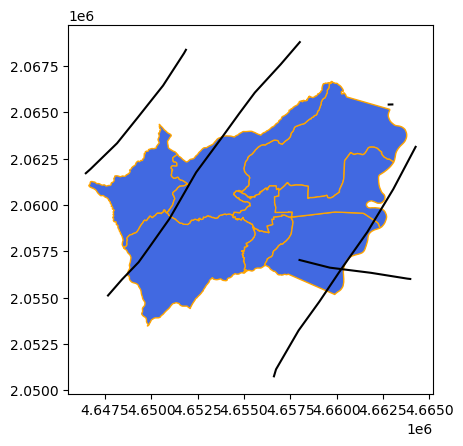

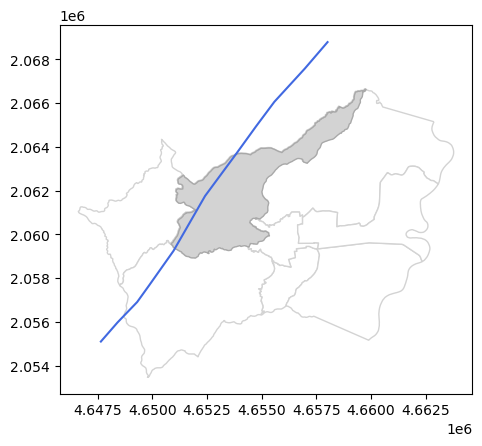

In [586]:
# Original plot showing Corregmientos and geological faults layers at the same time
base = df_correg.plot(color='royalblue', edgecolor='Orange')
df_geol.plot(ax=base, color='black', edgecolor='red');

# Subset (intersects) showing the Aguadas township and the fault line which is passing by 
base = df_correg.plot(color='white', edgecolor='lightgrey')
aguadas.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
intersect.plot(ax=base, color='royalblue', edgecolor='red');

**Intersection**: This code is intended to check the townships a fault line is intersecting

In [588]:
# Subsetting with just a fault named 'Falla Toro'
toro_fault = df_geol[df_geol['NOM_ESTRUC'] == 'Falla Toro']
toro_fault

,TIPO_ESTRU,NOM_ESTRUC,COD_CUENCA,ANNO_EST_E,ANNO_EST_A,SHAPE_LEN,geometry
3,100000,Falla Toro,None,0,0,54184.007718,"LINESTRING (4658042.777 2068828.486, 4657845.6..."


In [595]:
# Identify whether the fault intersects whit some townships

sel_1 = df_correg.intersects(toro_fault.geometry.iloc[0])
sel_1

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
dtype: bool

In [597]:
# Identify the townships intersecting whit the geological fault 

intersect_1 = df_correg[sel_1]
intersect_1

,COD_DEPART,COD_MUNICI,NOM_MUNICI,COD_DIV_PO,NOM_DIV_PO,CLASE_DIV_,FUENTE,ANNO_DIV_E,ANNO_AJUST,SHAPE_AREA,SHAPE_LEN,geometry
5,76,76400,La Union,76400004,La Despensa,Corregimiento,None,2010,2022,2.609146e+07,25514.432321,"POLYGON ((4650839.235 2059568.631, 4650847.46 ..."
6,76,76400,La Union,76400003,Aguadas,Corregimiento,None,2010,2022,1.932429e+07,32686.635940,"POLYGON ((4659747.478 2066655.303, 4659749.33 ..."


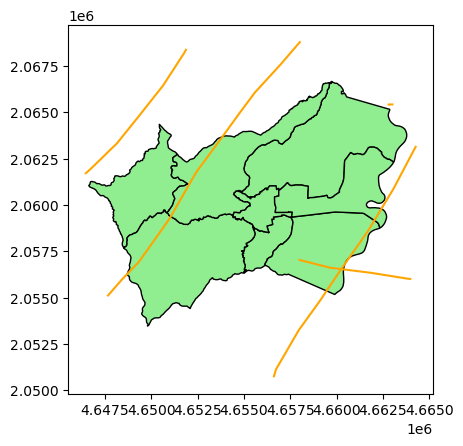

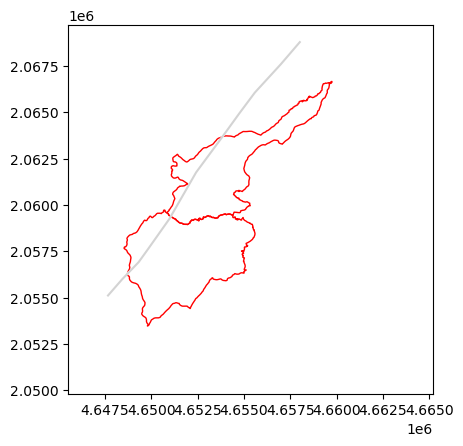

In [60]:
# Original
base = df_geol.plot(color='orange', edgecolor='lightgrey')
df_correg.plot(ax=base, color='lightgreen', edgecolor='black');
# Subset (intersects)
base = df_geol.plot(color='white', edgecolor='lightgrey')
toro_fault.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
intersect_1.plot(ax=base, color='None', edgecolor='red');

**We want to know in which townships of 'Corregimientos' layer from La Union municipality is located each mining exploitation. By knowing this, we can discard these areas for agricultural uses.**

In [148]:
# Open La Union 'Recurso_Minero' vector layer. This layer shows a column named NOM_REC_MI. 

path_shp_mining = r"C:\Users\Cristian\Downloads\La Union\Recurso_Minero_La_Union/Recurso_Minero.shp"
df_mining = gpd.read_file(path_shp_mining)

# Rename the column name to: Nombre explotación minera

df_mining_n = df_mining[['NOM_REC_MI', 'geometry']].rename(columns={'NOM_REC_MI': 'nombre_explotacion_minera'})

df_mining_n

,Nombre_Explotacion_Minera,geometry
0,Sin Definir,POINT (4655713.732 2057753.365)
1,Tejar de Aurelio Gallo,POINT (4657076.785 2061884.088)
2,Ladrillera Palo de Leche,POINT (4663480.757 2055608.475)
3,Cantera La Balastrera,POINT (4663671.076 2058990.999)
4,Cantera Via Versalles,POINT (4654341.432 2061183.037)
5,Ladrillera Granada,POINT (4655249.503 2060777.646)
6,NN/La Oculta Vereda El,POINT (4655461.926 2058695.302)
7,Ladrillera Don Abel/Barrio,POINT (4663654.02 2057878.404)
8,Gallinazo,POINT (4646462.038 2059506.798)
9,Galpon El Brillante,POINT (4657047.363 2061988.06)


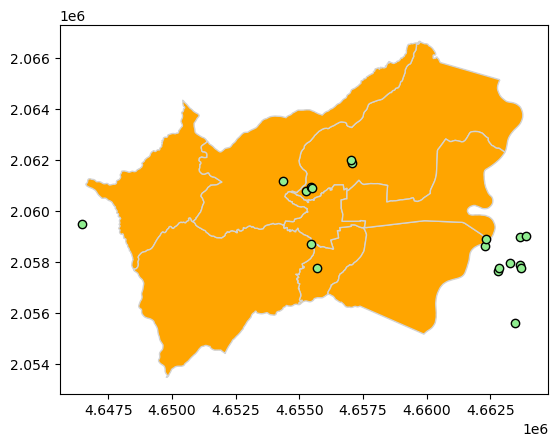

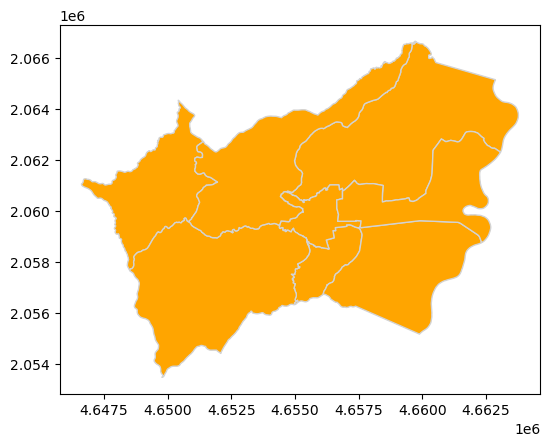

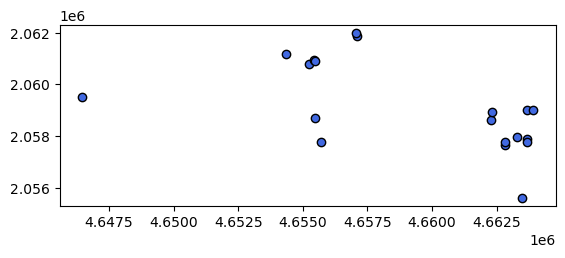

In [142]:

# Original

# Plot the two overlayed layers 
base = df_correg.plot(color='orange', edgecolor='lightgrey')
df_mining_n.plot(ax=base, color='lightgreen', edgecolor='black');

# Plot each layer separately
base = df_correg.plot(color='orange', edgecolor='lightgrey');
base = df_mining.plot(color='royalblue', edgecolor='black');



# Subset (intersects)
#base = df_mining_n.plot(color='white', edgecolor='lightgrey')
#toro_fault.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
#intersect_1.plot(ax=base, color='None', edgecolor='red');




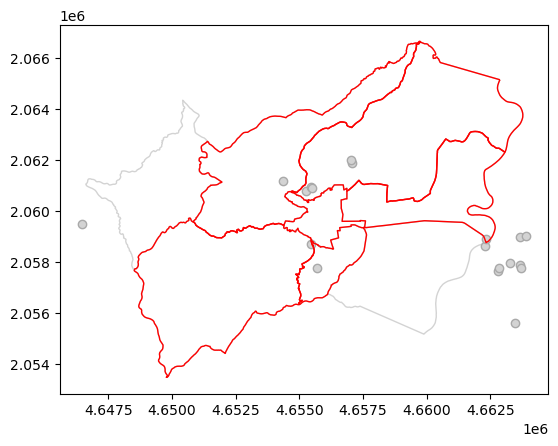

In [104]:
# Make the intersection between df_correg layer and df_mining_n

inter = df_correg[df_correg.intersects(df_mining_n.union_all())]
inter

# Subset (intersects)
base = df_correg.plot(color='white', edgecolor='lightgrey', legend=True)
df_mining_n.plot(ax=base, color='lightgrey', edgecolor='darkgrey', legend=True)
inter.plot(ax=base, color='None', edgecolor='red', legend=True);

In [152]:
df_correg.intersects(df_mining_n.geometry.iloc[0])

#df_correg.intersects(df_mining_n, align=True)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

**We want to know how many rural properties there are per vereda**


In [162]:
## Open vector layer 'terreno_de_predio_rural_igac' 
path_shp_ruralp=r"C:\Users\Cristian\Downloads\La Union\Terreno_de_Predio_Rural_IGAC\terreno_de_predio_rural_igac_la_union/terreno_de_predio_rural_igac.shp"
df_ruralp = gpd.read_file(path_shp_ruralp)

df_ruralp

,CODIGO,VEREDA_COD,NUMERO_SUB,CODIGO_ANT,GLOBALID,NOM_MUNIC,NOM_DPTO,DIRECCION,DESTINO_EC,AREA_TERRE,AREA_CONST,NOM_VEREDA,MUNICIPIO,RULEID,SHAPE_AREA,SHAPE_LEN,geometry
0,764000002000000040290000000000,76400000200000004,0,76400000200040290000,{8BE0836F-30A0-42CD-81C6-33D180336D7C},76400,76,None,None,None,None,76400000200000004,76400,0,19028.590276,668.112504,"POLYGON ((4647564.448 2060762.444, 4647548.3 2..."
1,764000002000000030509000000000,76400000200000003,0,76400000200030509000,{1DA7FF5A-8EFD-431E-AC8F-F816593F965B},76400,76,None,None,None,None,76400000200000003,76400,0,79740.657952,1118.816843,"POLYGON ((4649538.167 2057538.668, 4649514.908..."
2,764000002000000040133000000000,76400000200000004,0,76400000200040133000,{8C1AC71D-5027-4425-9046-BA6BB92D41DB},76400,76,None,None,None,None,76400000200000004,76400,0,216.469521,62.952250,"POLYGON ((4648731.899 2059159.711, 4648728.84 ..."
3,764000002000000040172000000000,76400000200000004,0,76400000200040172000,{AEE67F79-51D3-4939-B3F5-1652D184FD31},76400,76,None,None,None,None,76400000200000004,76400,0,401.139545,82.057926,"POLYGON ((4648731.899 2059159.711, 4648718.999..."
4,764000002000000040271000000000,76400000200000004,0,76400000200040271000,{27235111-5412-42A7-AB24-878C9F2372C8},76400,76,None,None,None,None,76400000200000004,76400,0,6962.935595,416.610734,"POLYGON ((4649170.143 2059454.851, 4649194.184..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,764000001000000030463000000000,76400000100000003,0,76400000100030463000,{BEABA29C-8B35-4718-BA1F-B376351C8E46},76400,76,None,None,None,None,76400000100000003,76400,0,224541.011083,2320.634057,"POLYGON ((4662641.384 2063888.78, 4662570.991 ..."
4620,764000001000000030417000000000,76400000100000003,0,76400000100030417000,{DFDD6711-4531-4B7E-A307-9550273F0270},76400,76,None,None,None,None,76400000100000003,76400,0,240857.396573,2142.847757,"POLYGON ((4663483.293 2063404.815, 4663486.874..."
4621,764000001000000031433000000000,76400000100000003,0,76400000100031433000,{F9A6088A-4FDE-4103-8422-094C67176FBE},76400,76,None,None,None,None,76400000100000003,76400,0,67851.699073,1478.643442,"POLYGON ((4661975.3 2064570.588, 4661893.464 2..."
4622,764000001000000030551000000000,76400000100000003,0,76400000100030551000,{03F0A5F8-644B-4AC9-B4FE-34A9131BB7A1},76400,76,None,None,None,None,76400000100000003,76400,0,698.737598,106.046927,"POLYGON ((4662928.253 2062423.475, 4662917.331..."


In [4]:
## Open vector layer 'Vereda_Rural_IGAC' 
path_shp_vereda=r"C:\Users\Cristian\Downloads\La Union\veredas_la_union/veres_la_union.shp"
df_vereda = gpd.read_file(path_shp_vereda)

df_vereda

,CODIGO,SECTOR_COD,NOMBRE,CODIGO_ANT,GLOBALID,RULEID,SHAPE_AREA,SHAPE_LEN,geometry
0,76400000100000002,764000001,CORCEGA,7640000010002,{E76D4D7F-72C8-4B4C-9966-1F3495DF29AE},0,7.468662e+06,19935.437024,"POLYGON ((4662245.507 2061601.521, 4662235.43 ..."
1,76400000200000002,764000002,LA AGUADA,7640000020002,{450EF18D-1C40-4F70-9DC9-3C110D85688E},0,1.547816e+07,32376.360304,"POLYGON ((4659870.218 2066577.923, 4659875.174..."
2,76400000200000004,764000002,QUEBRADA GRANDE,7640000020004,{12988B8F-C1D3-4210-BD5E-C7A846AF7238},0,1.141978e+07,21621.835163,"POLYGON ((4651259.622 2062846.859, 4651263.223..."
3,76400000100000003,764000001,SAN LUIS,7640000010003,{199D8D8F-A54D-45BC-9636-90516879F960},0,2.450647e+07,34267.800659,"POLYGON ((4662245.507 2061601.521, 4662229.048..."
4,76400000200000003,764000002,LA DESPENSA,7640000020003,{B11AA9D1-CE16-4A0E-8F88-091036105BB8},0,3.110539e+07,30966.577156,"POLYGON ((4650886.776 2060810.685, 4650893.416..."
5,76400000100000004,764000001,CABECERA MPAL.,7640000010004,{5343B731-ADA5-490E-9743-0E650206CE7B},0,5.120773e+06,13930.468907,"MULTIPOLYGON (((4655413.031 2059170.515, 46554..."
6,76400000200000001,764000002,SAN LUIS,7640000020001,{5386D564-4121-4B71-A429-BADFE414B5B8},0,7.021742e+06,23589.668557,"MULTIPOLYGON (((4658294.628 2063928.532, 46583..."
7,76400000100000001,764000001,EL LINDERO,7640000010001,{6995A900-B570-4D03-990E-548938B504BE},0,1.420462e+07,16817.578161,"POLYGON ((4662312.963 2058886.746, 4662242.904..."


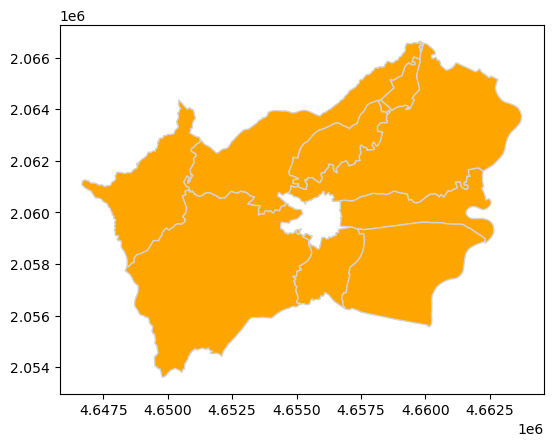

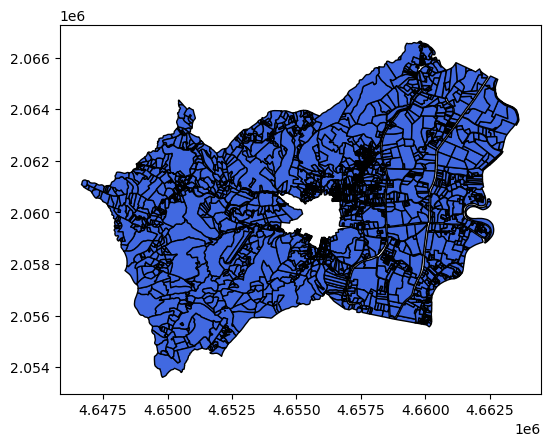

In [180]:
# Plot each layer separately
base = df_vereda.plot(color='orange', edgecolor='lightgrey');
base = df_ruralp.plot(color='royalblue', edgecolor='black');


**En cuáles veredas y cuánta área ocupa por vereda los paisajes Planicie Aluvial y Piedemonte por vereda?**

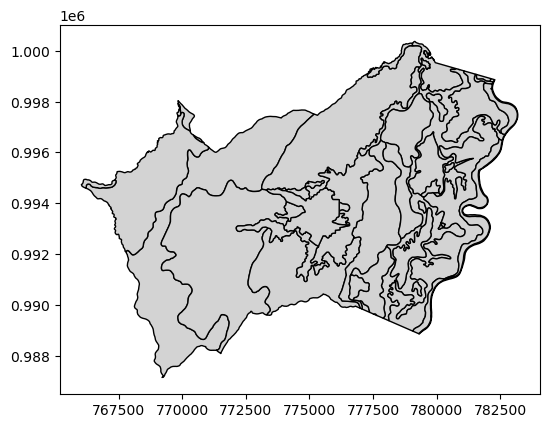

In [193]:
## Open vector layer 'Estudio_suelos_la_union' 
path_shp_suelos=r"C:\Users\Cristian\Downloads\La Union\estudio_suelos_la_union/Estudio_suelos_la_union.shp"
df_suelos = gpd.read_file(path_shp_suelos)

df_suelos

base = df_suelos.plot(color='lightgray', edgecolor='black');

**Open a raster layer corresponding to the La Union DEM**

In [63]:
union_dem = rasterio.open(r'C:\Users\Cristian\Downloads\La Union\union_dem\dem_la_union.tif')
union_dem
union_dem.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': 0.0,
 'width': 1380,
 'height': 1067,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'),
 'transform': Affine(12.5, 0.0, 368451.15625,
        0.0, -12.5, 508243.40625)}

In [79]:
elev = union_dem.read(1)
elev

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [65]:
union_dem.count
union_dem.width
union_dem.height

1067

In [69]:
union_dem.bounds

BoundingBox(left=368451.15625, bottom=494905.90625, right=385701.15625, top=508243.40625)

In [71]:
union_dem.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]')

In [75]:
from rasterio.plot import show

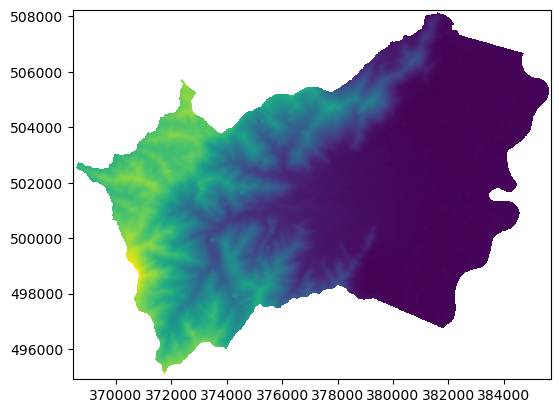

<Axes: >

In [77]:
show(union_dem)

In [131]:
gen_dem = rasterio.open(r'C:\Users\Cristian\Downloads\AP_21240_FBS_F0070_RT1\AP_21240_FBS_F0070_RT1/AP_21240_FBS_F0070_RT1.dem.tif')
gen_dem

<open DatasetReader name='C:\Users\Cristian\Downloads\AP_21240_FBS_F0070_RT1\AP_21240_FBS_F0070_RT1/AP_21240_FBS_F0070_RT1.dem.tif' mode='r'>

**Clip a raster dataset to the extent of a vector layer**

In [286]:
# Open a raster file ‘connection’ using rasterio.open
gen_elev = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/elevation.tif')
gen_elev.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 574,
 'height': 445,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0002694945852358564, 0.0, -76.18552917014256,
        0.0, -0.0002694945852358564, 4.596808661120797)}

In [510]:
# Read raster values from the connection using the .read method
elev_3 = gen_elev.read(1)
elev_3


0

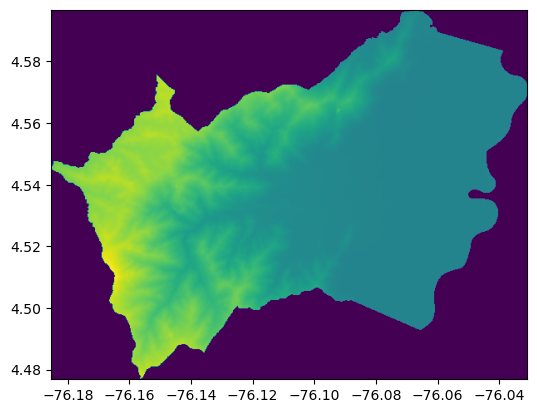

<Axes: >

In [139]:
show(gen_elev)

In [159]:
np.mean(elev_3)

625.9269623771679

In [278]:
# open a Polygon vector layer
path_shp_uni=r"C:\Users\Cristian\Downloads\La Union\unidad_cartografica/unidad_cartografica.shp"
df_uni = gpd.read_file(path_shp_uni)

df_uni_new = df_uni.to_crs(epsg = 4326)

shape = [df_uni_new['geometry']]
df_uni_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

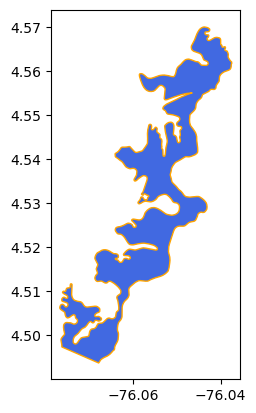

In [312]:
# Plot vector layer correcponding to a cartographic unit located in La Union municipality
base = df_uni_new.plot(color='royalblue', edgecolor='orange');

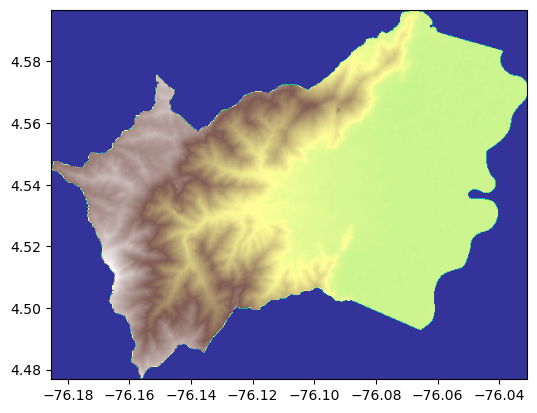

<Axes: >

In [288]:
# gen_elev and df_uni
show((gen_elev, 1), cmap='terrain')

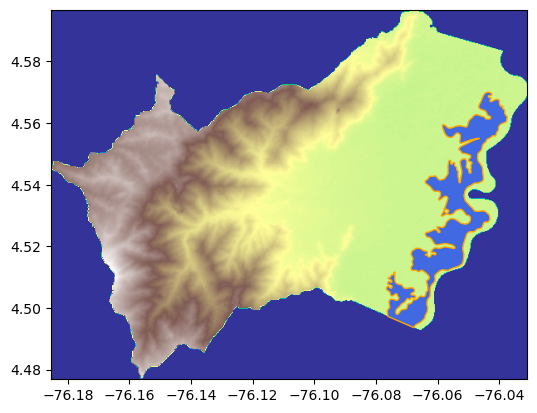

<Axes: >

In [314]:
# Plot the raster layer overlapped whit the vector layer 
base = df_uni_new.plot(color='royalblue', edgecolor='orange');
show((gen_elev, 1), cmap='terrain')

In [304]:
# Apply the mask to clip the raster 

from rasterio.mask import mask
with rasterio.open('C:/Users/Cristian/Downloads/La Union/rasters/elevation.tif') as src:
    out_image, out_transform = rasterio.mask.mask(src, df_uni_new.geometry, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
# Downlod the clipped layer  
with rasterio.open("C:/Users/Cristian/Downloads/La Union/rasters/RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

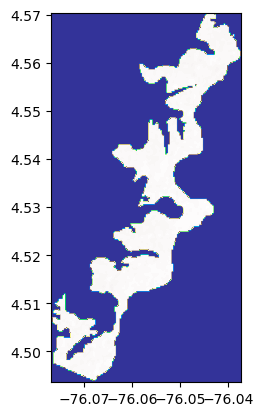

<Axes: >

In [322]:
# Open the clipped raster file
gen_elev_clp = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/RGB.byte.masked.tif')

show((gen_elev_clp, 1), cmap='terrain')

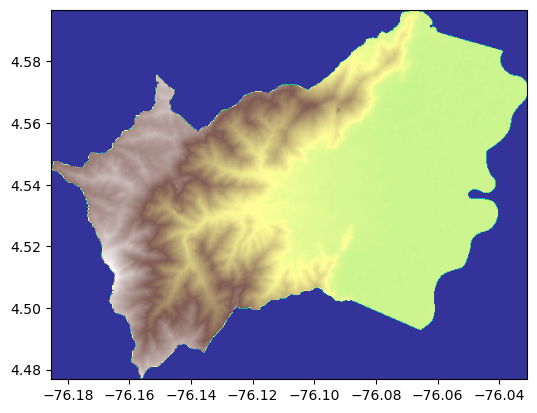

<Axes: >

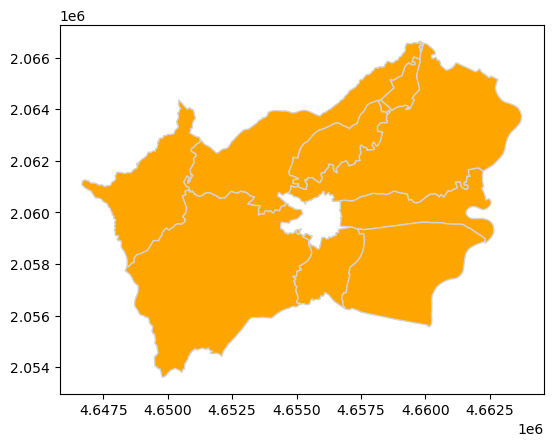

In [331]:
base = show((gen_elev, 1), cmap='terrain');
df_vereda.plot(color='orange', edgecolor='lightgrey')


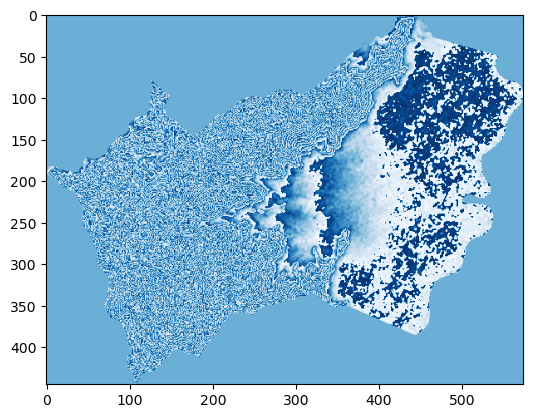

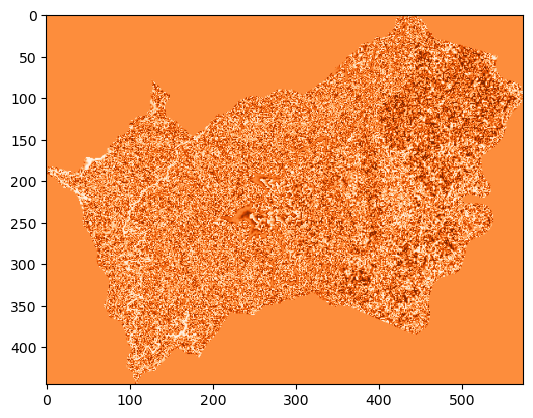

C:\Users\Cristian\AppData\Local\Temp\ipykernel_10024\455209868.py:3: RuntimeWarning: divide by zero encountered in log
  rasterio.plot.show(np.log(elev_3), cmap='Oranges');


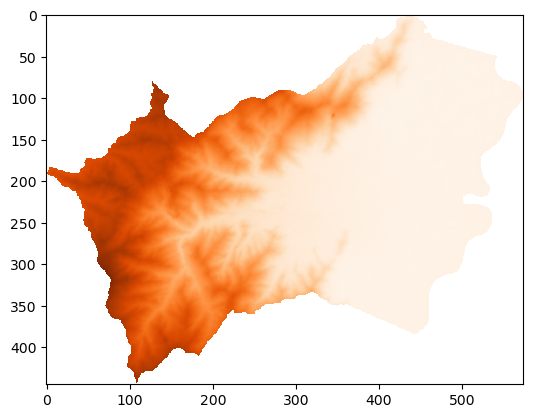

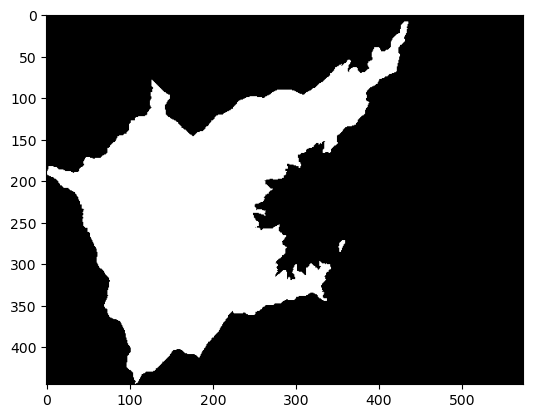

In [387]:
rasterio.plot.show(elev_3**2, cmap='Blues');
rasterio.plot.show(elev_3.astype(int)**4, cmap='Oranges');
rasterio.plot.show(np.log(elev_3), cmap='Oranges');
rasterio.plot.show(elev_3 < 1000, cmap='Grays');

**We want to classify the DEM into groups acording to numeric intervals. The higher the levation, the area has less capacity for agriculture**

In [377]:
# classification of intervals of numeric values. Classes: 1 = Unsuitable, 2 = Suitable, 3 = Moderate and 4 = Marginal
recl = elev_3.copy()
recl[(elev_3 > 0)  & (elev_3 <= 300)] = 1
recl[(elev_3 > 300) & (elev_3 <= 1000)] = 2
recl[(elev_3 > 1000) & (elev_3 <= 1400)] = 3
recl[(elev_3 > 1400)] = 4

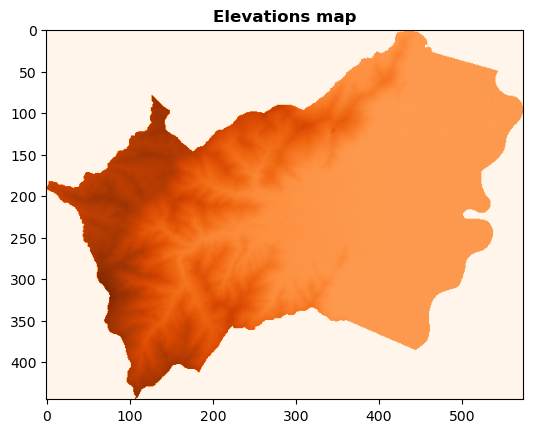

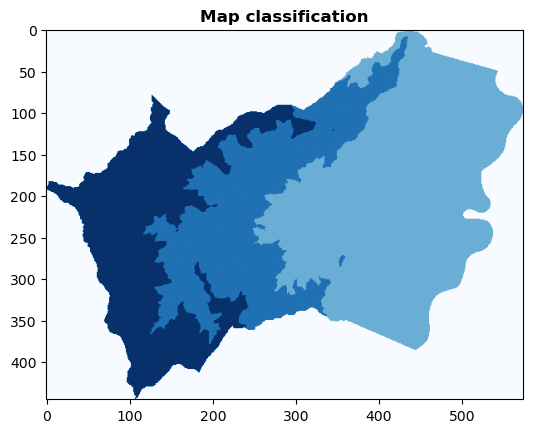

In [560]:
rasterio.plot.show(elev_3, cmap='Oranges', title = 'Elevations map');
rasterio.plot.show(recl, cmap='Blues', title = 'Map classification');

In [428]:
# Open a raster file ‘connection’ using rasterio.open
gen_slope = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/slope.tif')
# gen_slope.meta

slope = gen_slope.read(1)
slope

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

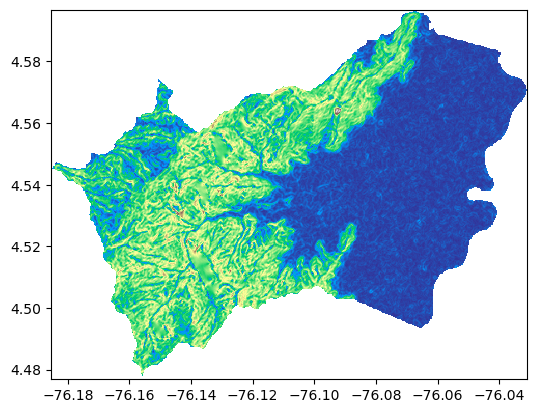

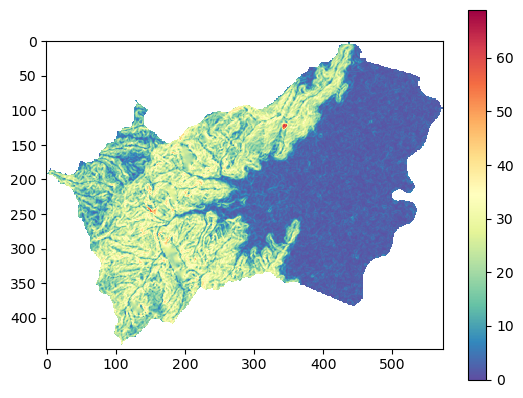

In [538]:
base = show((gen_slope, 1), cmap='terrain')
fig, ax = plt.subplots()
rasterio.plot.show(gen_slope, cmap='Spectral_r', ax=ax)
fig.colorbar(ax.imshow(slope, cmap='Spectral_r'), ax=ax);

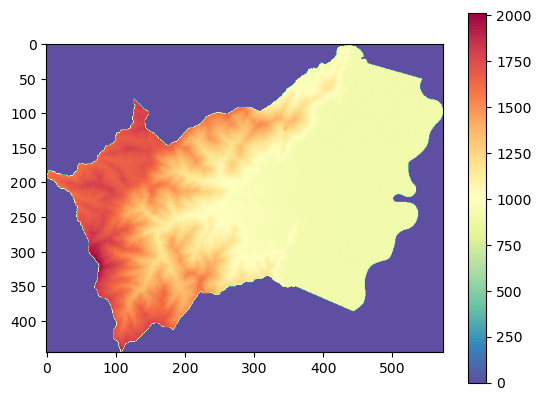

In [450]:
# Derive slope and aspect from a DEM
gen_elev = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/elevation.tif')
srtm = gen_elev.read(1).astype(float)
srtm[srtm == gen_elev.nodata] = np.nan
fig, ax = plt.subplots()
rasterio.plot.show(gen_elev, cmap='Spectral_r', ax=ax)
fig.colorbar(ax.imshow(srtm, cmap='Spectral_r'), ax=ax);

#elev_3 = gen_elev.read(1)


**NDVI calculation**

<Axes: title={'center': 'Band 3'}>

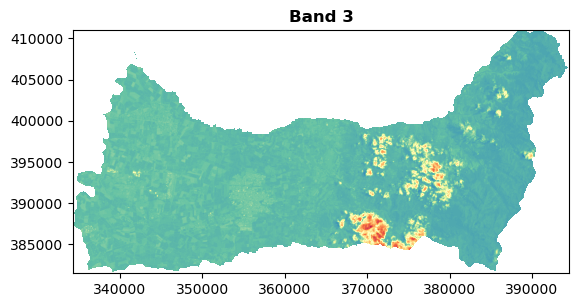

In [556]:
# Open band 3 from a Landsat 8 image corresponding to Palmira municipality
band_3 = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/banda_3.tif')
b_3 = band_3.read(1).astype(float)
b_3[b_3 == band_3.nodata] = np.nan
fig, ax = plt.subplots()
rasterio.plot.show(band_3, cmap='Spectral_r', ax=ax, title='Band 3')

<Axes: title={'center': 'Band 4'}>

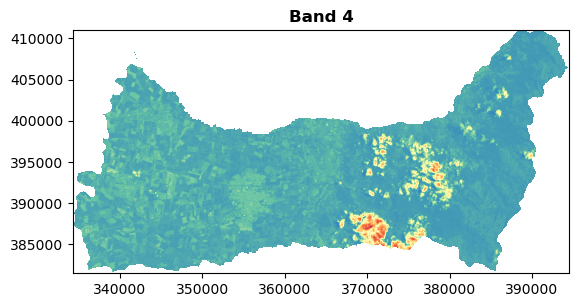

In [558]:
# Open band 4 from a Landsat 8 image corresponding to Palmira municipality

band_4 = rasterio.open(r'C:/Users/Cristian/Downloads/La Union/rasters/banda_4.tif')
b_4 = band_4.read(1).astype(float)
b_4[b_4 == band_4.nodata] = np.nan
fig, ax = plt.subplots()
rasterio.plot.show(band_4, cmap='Spectral_r', ax=ax, title='Band 4')

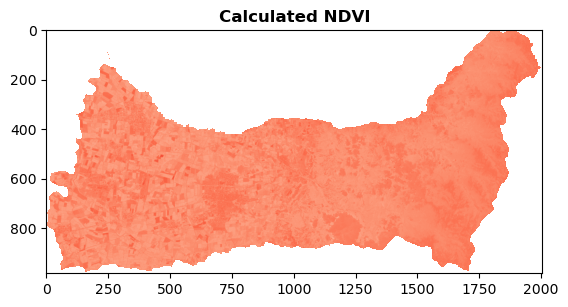

In [600]:
# Calculte the NDVI using the NDVI formula
ndvi = (b_4 - b_3) / (b_4 + b_3)

# Plot the resulting map
rasterio.plot.show(ndvi, cmap='Reds', title='Calculated NDVI',);

nan